### PHY 405
#### Jeremy Kazimer
#### 5018-1732

**IMPORTS**

In [1]:
# Data structures:
import numpy as np

# Visualization:
from matplotlib import pyplot as plt
import networkx as nx

**FUNCTIONS**

#### Networks

In [2]:
def erdos_renyi_Gnp(n, p, self_edges = False):
    # n -> network size (number nodes)
    # p -> edge probability
    # self_edges -> flag to see if user wants connectivity within nodes
    
    # Here, we store an array where the edges
    # are less than the probability.
    # This is roughly M = N^2 * p.
    B = np.array(np.random.rand(n, n) < p, dtype=int)
    B = np.triu(B)
    
    # Adding together the upper and lower triangulars
    # since it is a symmetric matrix.
    if self_edges == True:
        A = B + B.T - np.diag(np.diag(B))
    else:
        A = B + B.T - 2*np.diag(np.diag(B))
        
    return A

In [3]:
def two_block_sbm(N, p_in, p_out, self_edges = False):
    # p_in -> network connectivity within communities
    # p_out -> network connectivity outside communities
    
    # We assume p_in is the same for both communities, though
    # this isn't always true.
    
    A = np.zeros((N, N))
    
    # Equally sized communities.  Otherwise, n_k = {n_0, n_1, n_2 ... n_k} where
    # k is the number of communities.  \sum n_k = N.
    n = N//2

    A00 = erdos_renyi_Gnp(N//2, p_in)
    A11 = erdos_renyi_Gnp(N//2, p_in)
    
    A0 = erdos_renyi_Gnp(N//2, p_out, self_edges=True)

    A[0:n, 0:n] = A00
    A[n:2*n, n:2*n] = A11
    A[0:n, n:2*n] = A0
    A[n:2*n, 0:n] = A0.T

    return A

#### Entropy

In [7]:
# B_entropy denotes the entropy where beta is a parameter, hence the B.
def B_entropy(A, beta):
    # A -> adjacency matrix
    # beta -> sensitivity parameter
    
    # The Laplacian matrix, L = D - A
    L = np.diag(np.sum(A, axis = 1)) - A
    
    # Eigenvalues.  It is safe to assume this is
    # Hermitian because of symmetry.
    evals, _ = np.linalg.eigh(L)
    
    # Placeholder variables.
    z = np.exp(-beta*evals)
    z[np.isnan(z)] = 0
    Z = np.sum(z)
    f = z/Z

    H = -f*np.log2(f)
    
    # We discard NaN values
    # as they should be zero.
    H[np.isnan(H)] = 0
    return H

In [219]:
# M_entropy denotes the entropy where M is in the equation, hence M_entropy.
def M_entropy(A):
    
    L = np.diag(np.sum(A, axis = 1)) - A
    evals, _ = np.linalg.eigh(L)
    
    M = np.sum(A)/2
    
    # We accept the notion that 0log0 is 0.
    evals = evals[evals > 0]
    f = evals/(2*M)
    
    return -f*np.log2(f)

**GENERAL STRUCTURE OF NETWORKS**

In [10]:
N = 4
p_in = 1
p_out = 1

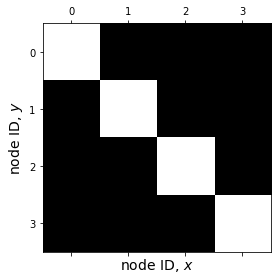

In [33]:
A = two_block_sbm(N, p_in, p_out)

fig, ax = plt.subplots(1, 1)

ax.spy(A)

ax.set_ylabel('node ID, $y$', fontsize = 14)
ax.set_xlabel('node ID, $x$', fontsize = 14)

fig.tight_layout()

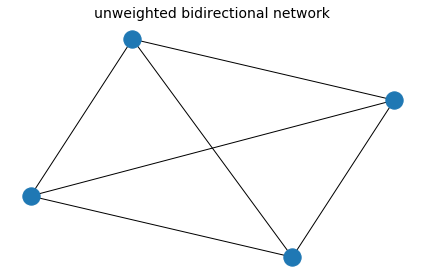

In [34]:
fig, ax = plt.subplots(1, 1)

nx.draw(nx.from_numpy_matrix(A), axis = ax)

ax.set_title('unweighted bidirectional network', fontsize = 14)

fig.tight_layout()

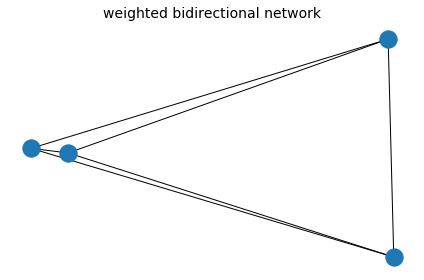

In [36]:
# We adjust weights
A[0, 1] = 1000
A[1, 0] = 1000

fig, ax = plt.subplots(1, 1)

nx.draw(nx.from_numpy_matrix(A), axis = ax)

ax.set_title('weighted bidirectional network', fontsize = 14)

fig.tight_layout()

**HISTOGRAMS**

In [49]:
# New parameters
N = 64
p_in = 1
p_out = 0

In [54]:
A0 = two_block_sbm(N, p_in, p_out)

L0 = np.diag(np.sum(A0, axis = 1)) - A0
eigs0,_ = np.linalg.eigh(L0)

In [57]:
A1 = two_block_sbm(N, p_in, p_in)

L1 = np.diag(np.sum(A1, axis = 1)) - A1
eigs1,_ = np.linalg.eigh(L1)

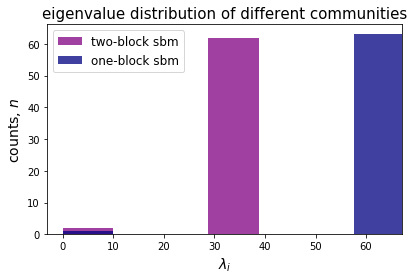

In [74]:
fig, ax = plt.subplots(1, 1)

ax.hist(eigs0, color = 'purple', width = 10, alpha = 0.75, label = 'two-block sbm')
ax.hist(eigs1, color = 'navy', width = 10, alpha = 0.75, label = 'one-block sbm')

ax.set_ylabel('counts, $n$', fontsize = 14)
ax.set_xlabel('$\lambda_i$', fontsize = 14)
ax.set_title('eigenvalue distribution of different communities', fontsize = 15)

ax.legend(loc = 'upper left', fontsize = 12)

fig.tight_layout()

In [77]:
N = 2000
p_in = 0.5
p_out = 0.5

A = two_block_sbm(N, p_in, p_out)
L = np.diag(np.sum(A,axis = 1)) - A
eigs, _ = np.linalg.eigh(L)

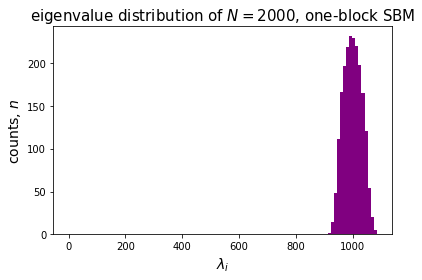

In [82]:
fig, ax = plt.subplots(1, 1)

ax.hist(eigs, 100, color = 'purple')

ax.set_ylabel('counts, $n$', fontsize = 14)
ax.set_xlabel('$\lambda_i$', fontsize = 14)
ax.set_title('eigenvalue distribution of $N = 2000$, one-block SBM', fontsize = 15)

fig.tight_layout()

**ENTROPY**

In [85]:
nodes = np.arange(2, 33)

H_b = np.zeros((nodes.shape[0]))
H_m = np.zeros((nodes.shape[0]))

for idx, n in enumerate(nodes):
                        
    A = two_block_sbm(2*n, 1, 0)
    
    H_m[idx] = M_entropy(A).sum()
    H_b[idx] = B_entropy(A, np.sum(A)/(4*n)).sum()

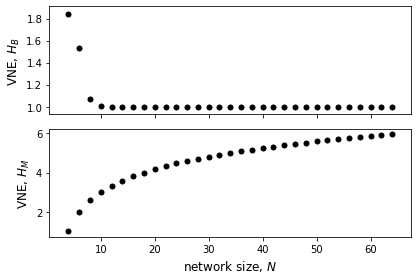

In [102]:
fig, axs = plt.subplots(2, 1, sharex = True, figsize = (6, 4))

axs[0].scatter(2*nodes, H_b, s = 25, c = 'k')
axs[1].scatter(2*nodes, H_m, s = 25, c = 'k')

axs[0].set_ylabel('VNE, $H_B$', fontsize = 12)

axs[1].set_ylabel('VNE, $H_M$', fontsize = 12)
axs[1].set_xlabel('network size, $N$', fontsize = 12)

fig.tight_layout()

**ENTROPY AS A FUNCTION OF TIME**

In [223]:
def time_dependent_entropy(N, p_in, p_out, t):
    # t -> number of rewires
    
    A = two_block_sbm(N, p_in, p_out)
    
    edges_to_add = np.argwhere(np.triu(1 - A) != 0)
    edges_to_add = [(edge[0], edge[1]) for edge in edges_to_add if edge[0] != edge[1]]
    edges_to_add = [(edge[0], edge[1]) for edge in edges_to_add if edge[0] <= N//2 and edge[1] >= N//2]
    edges_to_add = -np.sort(-np.random.permutation(edges_to_add)[:t])
    
    H_b = np.zeros(t)
    H_m = np.zeros(t)
    
    for idx, add in enumerate(edges_to_add):
        u, v = add
        
        H_b[idx] = B_entropy(A, 1).sum()
        H_m[idx] = M_entropy(A).sum()
        
        A[u, v] = 1
        A[v, u] = 1

    return H_b, H_m


In [224]:
t = 200

Ns = 2*np.array((16, 32, 64, 128))
p_in = 1
p_out = 0

entropies = np.zeros((2, t, Ns.shape[0]))

for idx, N in enumerate(Ns):

    entropies[:, :, idx] = time_dependent_entropy(N, p_in, p_out, t)

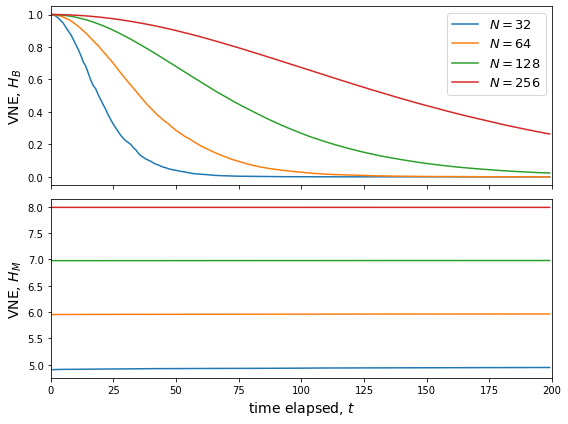

In [225]:
fig, axs = plt.subplots(2, 1, sharex = True, figsize = (8, 6))

axs[0].plot(np.arange(t), entropies[0])
axs[1].plot(np.arange(t), entropies[1])

axs[0].set_ylabel('VNE, $H_B$', fontsize = 14)
axs[1].set_ylabel('VNE, $H_M$', fontsize = 14)

lgnd = [r'$N = {}$'.format(N) for N in Ns]
axs[0].legend(lgnd, loc = 'upper right', fontsize = 13)

axs[1].set_xlim(0, t)
axs[1].set_xlabel('time elapsed, $t$', fontsize = 14)

fig.tight_layout()

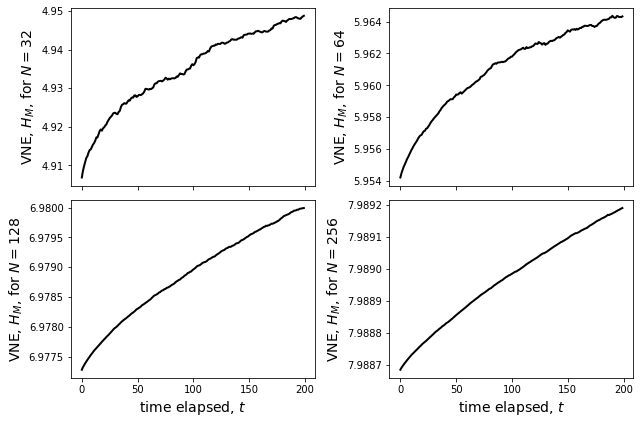

In [241]:
fig, axs = plt.subplots(2, 2, figsize = (9, 6), sharex = True)

reshaped = entropies[1].reshape(entropies[1].shape[0], 2, 2)
reshaped_Ns = Ns.reshape(2, 2)

for idx, _ in enumerate(axs):
    for jdx, _ in enumerate(axs):
        
        label = reshaped_Ns[idx, jdx]
        axs[idx][jdx].plot(reshaped[:, idx, jdx], lw = 2, c = 'k')
        
        axs[idx][jdx].set_ylabel('VNE, $H_M$, for $N = {}$'.format(label), fontsize = 14)
        
axs[1][0].set_xlabel('time elapsed, $t$', fontsize = 14)
axs[1][1].set_xlabel('time elapsed, $t$', fontsize = 14)

fig.tight_layout()

Note that this is a repackage of the original notebook, so figures may look different due to re-organization.